## Toy Datasets 1

In [31]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from smalldiffusion import (
    TimeInputMLP, ScheduleLogLinear, training_loop, samples,
    DatasaurusDozen, Swissroll, ModelMixin
)
from torch.utils.data import Dataset
from tqdm import tqdm
from torch import nn
from pathlib import Path
# import cv2
from PIL import Image

from typing import Optional, Union, Tuple
from itertools import pairwise

def plot_batch(batch):
    batch = batch.cpu().numpy()
    plt.scatter(batch[:,0], batch[:,1], marker='.')
    plt.axis('equal')

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

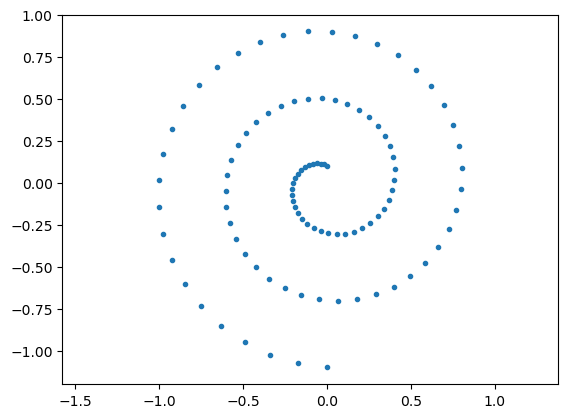

In [5]:
# Try replacing dataset with 'dino', 'bullseye', 'h_lines', 'x_shape', etc. 
# dataset = DatasaurusDozen(csv_file='../datasets/DatasaurusDozen.tsv', dataset='dino')
# Or use the SwissRoll dataset
batch_size=2130
dataset = Swissroll(np.pi/2, 5*np.pi, 100)
loader = DataLoader(dataset, batch_size=batch_size)
plot_batch(next(iter(loader)))

- Ok, there's a lot to like about Swiss Roll! I also want to try Welch Labs and 3b1b logos, let me hack on those now. 

In [15]:
path_to_graphics=Path('/home/stephen/manim_videos/_2025/sora/logos')

In [16]:
welch_labs_logo=Image.open(str(path_to_graphics/'logos_1-01.png'))

(-0.8706770833333334, 0.89046875, -0.8863020833333334, 0.87484375)

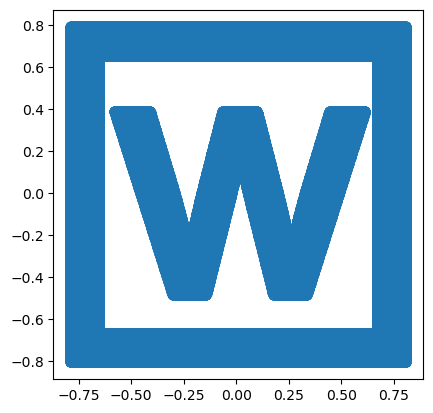

In [29]:
logo_masked=np.array(welch_labs_logo)[:,:,3]>0
y,x=np.where(logo_masked)
x=(x-welch_labs_logo.size[1]/2)/(welch_labs_logo.size[1]/2)
y=(welch_labs_logo.size[0]/2-y)/(welch_labs_logo.size[0]/2)

plt.scatter(x,y); plt.axis('square')

In [35]:
np.vstack((x,y)).T

array([[-0.790625  ,  0.79479167],
       [-0.78958333,  0.79479167],
       [-0.78854167,  0.79479167],
       ...,
       [ 0.80833333, -0.80625   ],
       [ 0.809375  , -0.80625   ],
       [ 0.81041667, -0.80625   ]])

In [52]:
class LogoDataset(Dataset):
    def __init__(self, path_to_logo):
        logo=Image.open(str(path_to_logo))
        logo_masked=np.array(logo)[:,:,3]>0
        y,x=np.where(logo_masked)
        x=(x-logo.size[1]/2)/(logo.size[1]/2)
        y=(logo.size[0]/2-y)/(logo.size[0]/2)
        self.points=np.vstack((x,y)).T

    def __len__(self):
        return len(self.points) 

    def __getitem__(self, i):
        return self.points[i % len(self.points)]


In [53]:
logo_dataset=LogoDataset(path_to_graphics/'logos_1-01.png')
sample=logo_dataset.points[np.random.choice(logo_dataset.points.shape[0], size=2048, replace=False)]

(-0.8706770833333334, 0.89046875, -0.88625, 0.8748958333333334)

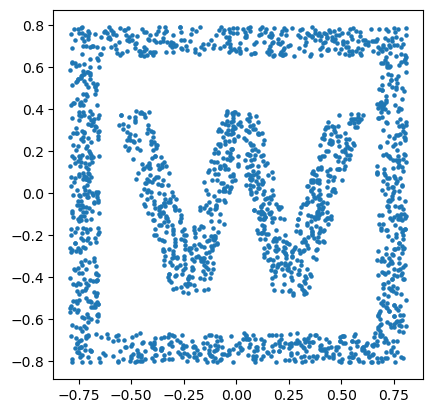

In [54]:
plt.scatter(sample[:,0], sample[:,1], s=5); plt.axis('square')

That's kinda cool! Cooler than i expected. You ddo need a decent number of points. 

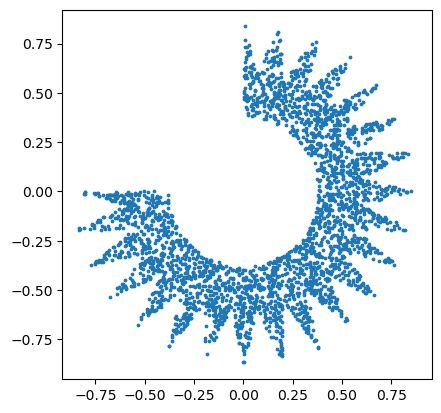

In [62]:
logo_dataset=LogoDataset(path_to_graphics/'logos_1-03.png')
sample=logo_dataset.points[np.random.choice(logo_dataset.points.shape[0], size=3000, replace=False)]
plt.scatter(sample[:,0], sample[:,1], s=3); plt.axis('square');

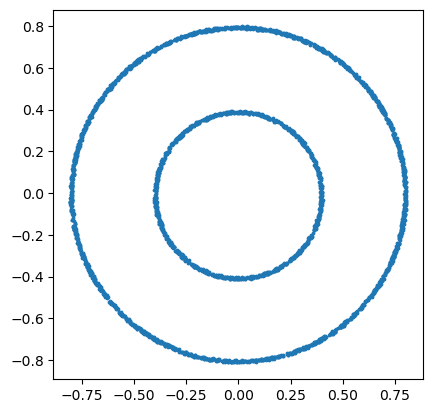

In [63]:
logo_dataset=LogoDataset(path_to_graphics/'logos_1-04.png')
sample=logo_dataset.points[np.random.choice(logo_dataset.points.shape[0], size=3000, replace=False)]
plt.scatter(sample[:,0], sample[:,1], s=3); plt.axis('square');

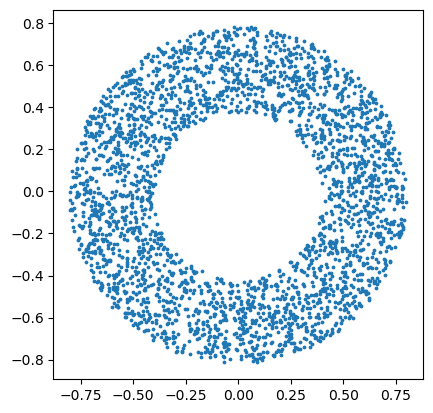

In [64]:
logo_dataset=LogoDataset(path_to_graphics/'logos_1-05.png')
sample=logo_dataset.points[np.random.choice(logo_dataset.points.shape[0], size=3000, replace=False)]
plt.scatter(sample[:,0], sample[:,1], s=3); plt.axis('square');

Ok cool - these are some nice options to have I think!